In [1]:
import xtrack as xt
import json
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

In [2]:
path_2023 = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/all_optics_2023"
path_2024 = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/all_optics_2024_reverted"
dic_res = {2023: {}, 2024: {}}
# List all folders in path_2023
for path, year in zip([path_2023, path_2024], [2023, 2024]):
    for f in os.listdir(path):
        if os.path.isdir(os.path.join(path, f)):
            idx_collider = int(f.split("_")[1]) + 23
            dic_res[year][idx_collider] = {}
            path_collider = os.path.join(path, f, "xtrack_0000/collider.json")
            try:
                collider = xt.Multiline.from_json(path_collider)
                collider.build_trackers()
                tw_b1 = collider.lhcb1.twiss()
                tw_b2 = collider.lhcb2.twiss()
                dic_res[year][idx_collider]['qx1'] = tw_b1.qx
                dic_res[year][idx_collider]['qy1'] = tw_b1.qy
                dic_res[year][idx_collider]['qx2'] = tw_b2.qx
                dic_res[year][idx_collider]['qy2'] = tw_b2.qy
            except:
                print("Error for collider {}".format(idx_collider))
                dic_res[year][idx_collider]['qx1'] = np.nan
                dic_res[year][idx_collider]['qy1'] = np.nan
                dic_res[year][idx_collider]['qx2'] = np.nan
                dic_res[year][idx_collider]['qy2'] = np.nan
                

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuil

In [3]:
l_optics_2023, l_dic_colliders_2023 = zip(*dic_res[2023].items())
l_optics_2024, l_dic_colliders_2024 = zip(*dic_res[2024].items())
l_qx1_2023, l_qy1_2023, l_qx2_2023, l_qy2_2023 = [[d[var] for d in l_dic_colliders_2023] for var in ['qx1', 'qy1', 'qx2', 'qy2']]
l_qx1_2024, l_qy1_2024, l_qx2_2024, l_qy2_2024 = [[d[var] for d in l_dic_colliders_2024] for var in ['qx1', 'qy1', 'qx2', 'qy2']]



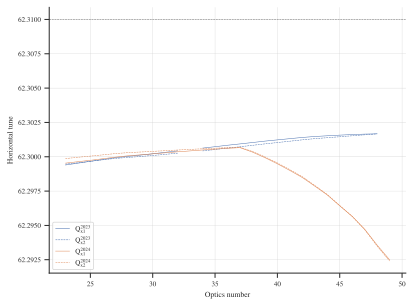

In [4]:
plt.plot(l_optics_2023, l_qx1_2023, label=r"$Q_{x1}^{2023}$", color = 'C0')
plt.plot(l_optics_2023, l_qx2_2023, label=r"$Q_{x2}^{2023}$", color = 'C0', linestyle='--')
plt.plot(l_optics_2024, l_qx1_2024, label=r"$Q_{x1}^{2024}$", color = 'C1')
plt.plot(l_optics_2024, l_qx2_2024, label=r"$Q_{x2}^{2024}$", color = 'C1', linestyle='--')
plt.axhline(62.31, color='black', linestyle='--', alpha=0.5)
plt.xlabel("Optics number")
plt.ylabel("Horizontal tune")
plt.grid()
plt.legend()
plt.savefig('2023.pdf')
plt.show()


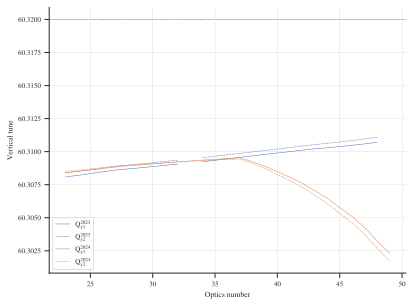

In [5]:
plt.plot(l_optics_2023, l_qy1_2023, label=r"$Q_{y1}^{2023}$", color = 'C0')
plt.plot(l_optics_2023, l_qy2_2023, label=r"$Q_{y2}^{2023}$", color = 'C0', linestyle='--')
plt.plot(l_optics_2024, l_qy1_2024, label=r"$Q_{y1}^{2024}$", color = 'C1')
plt.plot(l_optics_2024, l_qy2_2024, label=r"$Q_{y2}^{2024}$", color = 'C1', linestyle='--')
plt.axhline(60.32, color='black', linestyle='--', alpha=0.5)
plt.xlabel("Optics number")
plt.ylabel("Vertical tune")
plt.grid()
plt.legend()
plt.savefig('2024.pdf')
plt.show()
